In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.path as mpath
import matplotlib


import xarray as xr
import cartopy.crs as ccrs
import cartopy

from scipy.io import loadmat

In [2]:
# Load chaos7 data (provided by R. Chi-Duran, based upon http://www.spacecenter.dk/files/magnetic-models/CHAOS-7/)
SA = loadmat('data/sa_total_chaos7.mat')
SA_all = SA['sa_total']

# Define time, latitude, longitude arrays corresponding to the above
Nlat = 100
Nlon = Nlat*2
dt = 0.5
time = np.arange(2002,2019.5+dt,dt) 

lon = np.linspace(-180,180,Nlon)
lat = np.linspace(90,-90,Nlat)

# Convert to DataArray structure for easier plotting
SA_all_xr = xr.DataArray(SA_all,coords={'time':time,'latitude':lat,'longitude':lon},dims=['time','latitude','longitude'])


Text(0.5, 1.0, '')

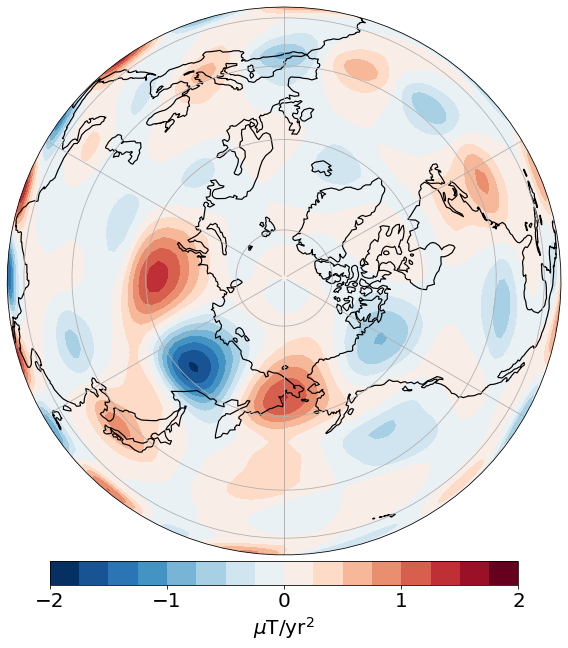

In [3]:
matplotlib.rcParams.update({'font.size':20})
fig,ax = plt.subplots(1,1,figsize=(12,12),subplot_kw={"projection":ccrs.Orthographic(central_longitude=-180.0, central_latitude=90.0)})
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])
ax.set_boundary(map_circle, transform=ax.transAxes)

lvls=np.arange(-2,2.1,0.25)
(SA_all_xr[28]/1000).plot.contourf(ax=ax,levels=lvls,transform =ccrs.PlateCarree(),cbar_kwargs={'location':'bottom','shrink':0.7,'pad':0.01,'label':r'$\mu$T/yr$^2$','ticks':range(-2,3,1)})
ax.set_extent([-180, 179, 90, 1], ccrs.PlateCarree())
ax.coastlines(linewidth=1.2)
ax.gridlines()
ax.set_title("")
#plt.savefig('figures/obs.png', format='png', dpi=600)
#plt.savefig('figures/obs.eps', format='eps',bbox_inches='tight')